In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.svm import SVR
import statsmodels.api as sm
import datetime
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dữ-liệu-Lịch-sử-VCB.csv',delimiter=";")
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)
df

,Price,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-02,41700,40942,42003,40638,3.57M,+1.29%
2018-01-03,41624,42079,42230,41321,2.35M,-0.18%
2018-01-04,42003,41396,42003,41169,2.54M,+0.91%
2018-01-05,40942,41776,41776,40866,2.61M,-2.53%
2018-01-08,42003,40942,42079,40183,2.64M,+2.59%
...,...,...,...,...,...,...
2023-12-11,84200,85000,85300,84100,1.40M,-0.94%
2023-12-12,84200,84700,84700,84000,1.01M,0.00%
2023-12-13,83700,84200,84500,83700,1.15M,-0.59%


<Axes: xlabel='Date'>

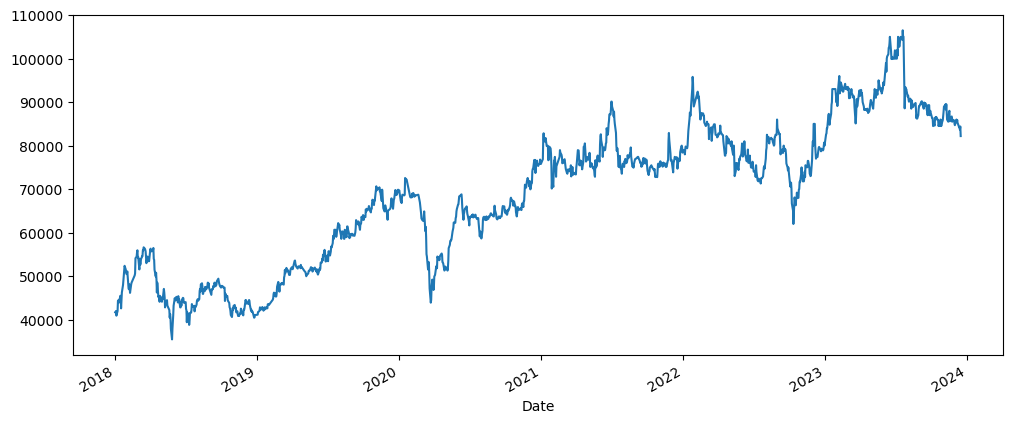

In [3]:
df['Price'].plot(figsize=(12,5))

In [4]:
# Perform Augmented Dickey-Fuller test
result = adfuller(np.diff(df['Price']))

# Extract and print the test statistics and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -23.7719217829146
p-value: 0.0


<Axes: xlabel='Date'>

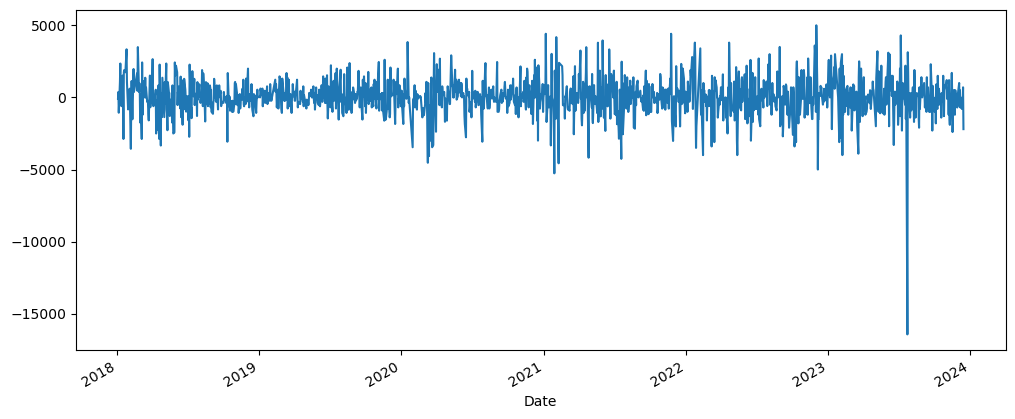

In [5]:
df['Price'].diff().plot(figsize=(12,5))

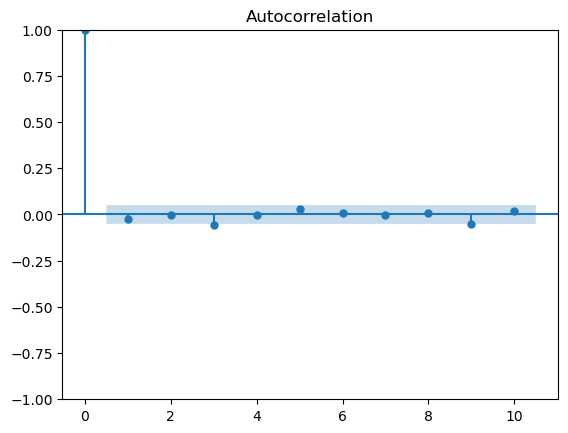

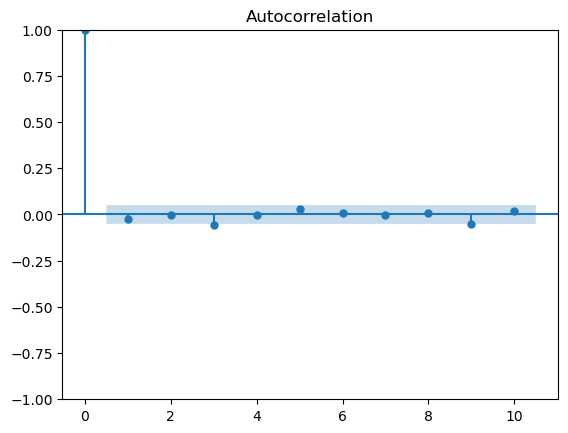

In [6]:
#ACF
sm.tsa.acf(np.diff(df['Price']), nlags=10)
sm.graphics.tsa.plot_acf(np.diff(df['Price']),lags=10)

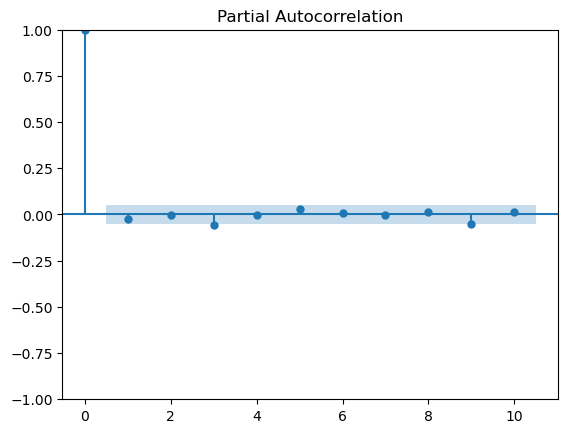

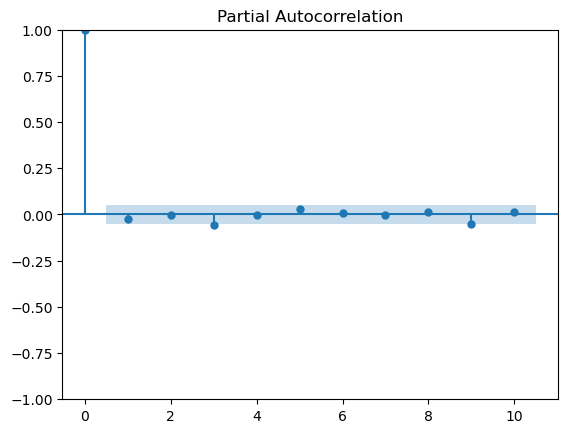

In [7]:
#PACF
sm.tsa.pacf(np.diff(df['Price']), nlags=10)
sm.graphics.tsa.plot_pacf(np.diff(df['Price']),lags=10)

In [8]:
#split training and testing (for model 7:3)
train_size1 = int(0.7 * len(df))
train1, test1 = df[:train_size1], df[train_size1:]

In [9]:
#split training and testing (for model 8:2)
train_size2 = int(0.8 * len(df))
train2, test2 = df[:train_size2], df[train_size2:]

In [10]:
#split training and testing (for model 9:1)
train_size3 = int(0.9 * len(df))
train3, test3 = df[:train_size3], df[train_size3:]

In [11]:
#using auto_arima for model Sarima 7:3
model73 = auto_arima(y = train1.Price,m=20)

In [12]:
#using auto_arima for model Sarima 8:2
model82 = auto_arima(y = train2.Price,m=20)

In [13]:
#using auto_arima for model Sarima 9:1
model91 = auto_arima(y = train3.Price,m=20)

In [14]:
#fitting 3 model
model73_fit = model73.fit(train1.Price)
model82_fit = model82.fit(train2.Price)
model91_fit = model91.fit(train3.Price)

In [15]:
#Prediction for model Sarima 7:3
predictions1 = pd.Series(model73.predict(n_periods = len(test1)))
predictions1.index = test1.index
predictions1

Date
2022-03-09    81500.0
2022-03-10    81500.0
2022-03-11    81500.0
2022-03-14    81500.0
2022-03-15    81500.0
               ...   
2023-12-11    81500.0
2023-12-12    81500.0
2023-12-13    81500.0
2023-12-14    81500.0
2023-12-15    81500.0
Length: 447, dtype: float64

In [16]:
#Prediction for model Sarima 8:2
predictions2 = pd.Series(model82.predict(n_periods = len(test2)))
predictions2.index = test2.index
predictions2

Date
2022-10-11    65100.0
2022-10-12    65100.0
2022-10-13    65100.0
2022-10-14    65100.0
2022-10-17    65100.0
               ...   
2023-12-11    65100.0
2023-12-12    65100.0
2023-12-13    65100.0
2023-12-14    65100.0
2023-12-15    65100.0
Length: 298, dtype: float64

In [17]:
#Prediction for model Sarima 9:1
predictions3 = pd.Series(model91.predict(n_periods = len(test3)))
predictions3.index = test3.index
predictions3

Date
2023-05-19    95000.0
2023-05-22    95000.0
2023-05-23    95000.0
2023-05-24    95000.0
2023-05-25    95000.0
               ...   
2023-12-11    95000.0
2023-12-12    95000.0
2023-12-13    95000.0
2023-12-14    95000.0
2023-12-15    95000.0
Length: 149, dtype: float64

<Axes: xlabel='Date'>

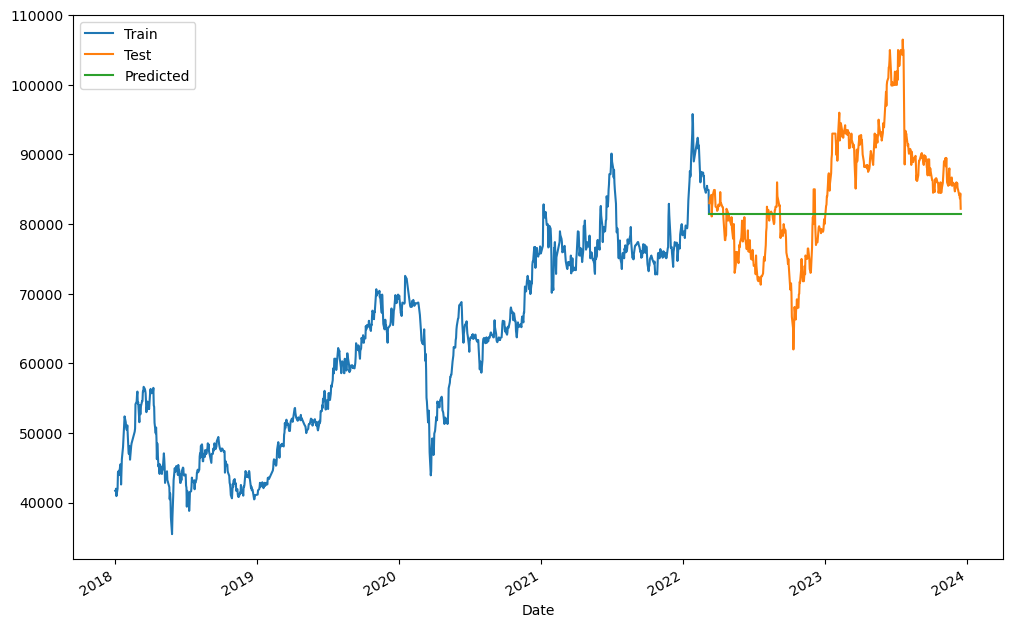

In [18]:
#Visualize train, test, predict of model 7:3
train1['Price'].plot(figsize=(12,8),legend=True,label='Train')
test1['Price'].plot(legend = True,label='Test')
predictions1.plot(legend = True,label='Predicted')

<Axes: xlabel='Date'>

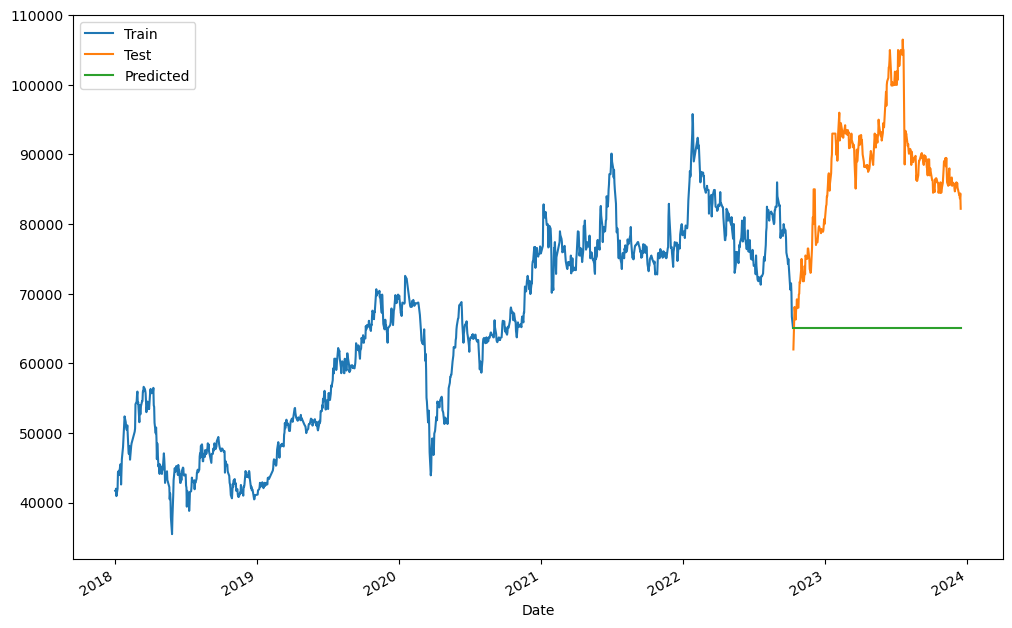

In [19]:
#Visualize train, test, predict of model 8:2
train2['Price'].plot(figsize=(12,8),legend=True,label='Train')
test2['Price'].plot(legend = True,label='Test')
predictions2.plot(legend = True,label='Predicted')

<Axes: xlabel='Date'>

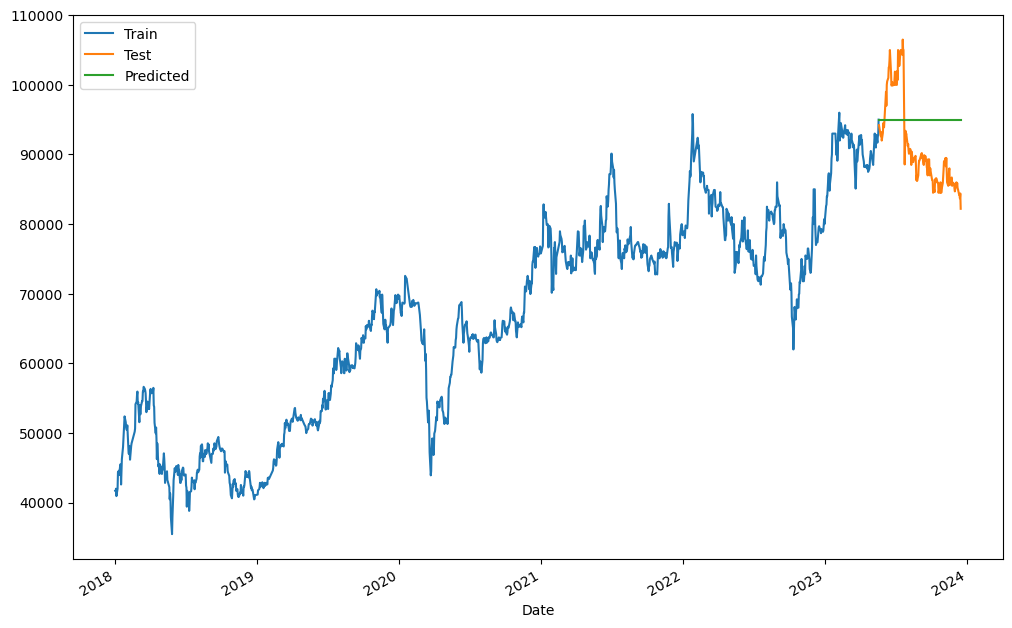

In [20]:
#Visualize train, test, predict of model 9:1
train3['Price'].plot(figsize=(12,8),legend=True,label='Train')
test3['Price'].plot(legend = True,label='Test')
predictions3.plot(legend = True,label='Predicted')

In [21]:
#Take the last data in the dataset
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[82200]])

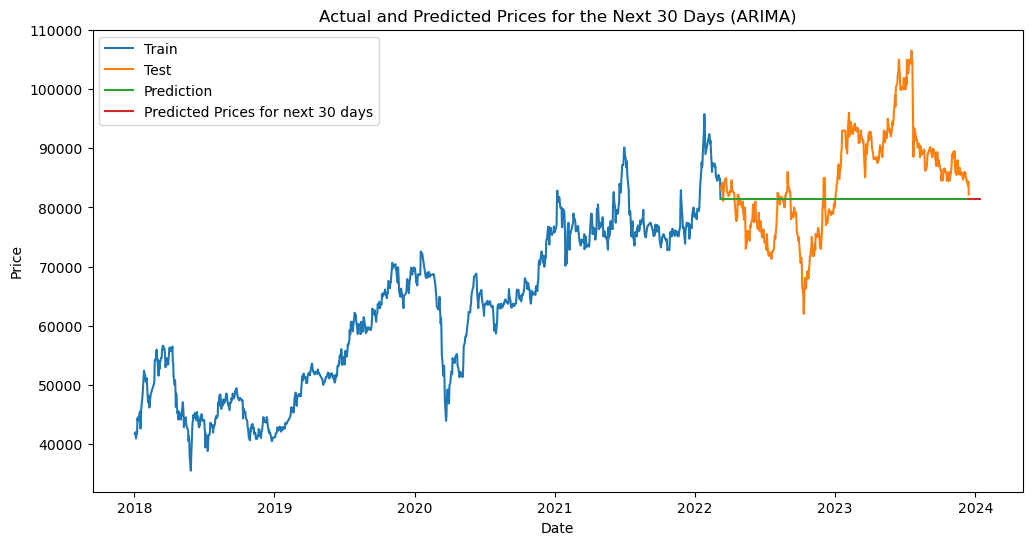

In [22]:
# Predict values for the next 30 days (model 7:3)
x_next_30_day_sarima1 = []

last_date = df.index[-1]

# Use the last known value in your dataset as the starting point
last_data = np.array(df['Price'].iloc[-1])

for i in range(30):
    # Predict using ARIMA model
    prediction = model73.predict(start=len(df), end=len(df) + i, dynamic=False)
    x_pred_next_sarima1 = prediction.values[-1]  # Access the values attribute instead of predicted_mean
    x_next_30_day_sarima1.append(x_pred_next_sarima1)

    # Update last_data for the next iteration
    last_data = np.array([x_pred_next_sarima1])

# Generate dates for the next 30 days
next_30_days1 = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Convert dates to a format compatible with your datetime index (if needed)
next_30_days_str1 = [date.strftime('%Y-%m-%d') for date in next_30_days1]

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(train1.index, train1['Price'], label='Train')
plt.plot(test1.index, test1['Price'], label='Test')
plt.plot(predictions1.index, predictions1, label='Prediction')
plt.plot(next_30_days1, x_next_30_day_sarima1, label='Predicted Prices for next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual and Predicted Prices for the Next 30 Days (ARIMA)')
plt.legend()
plt.show()


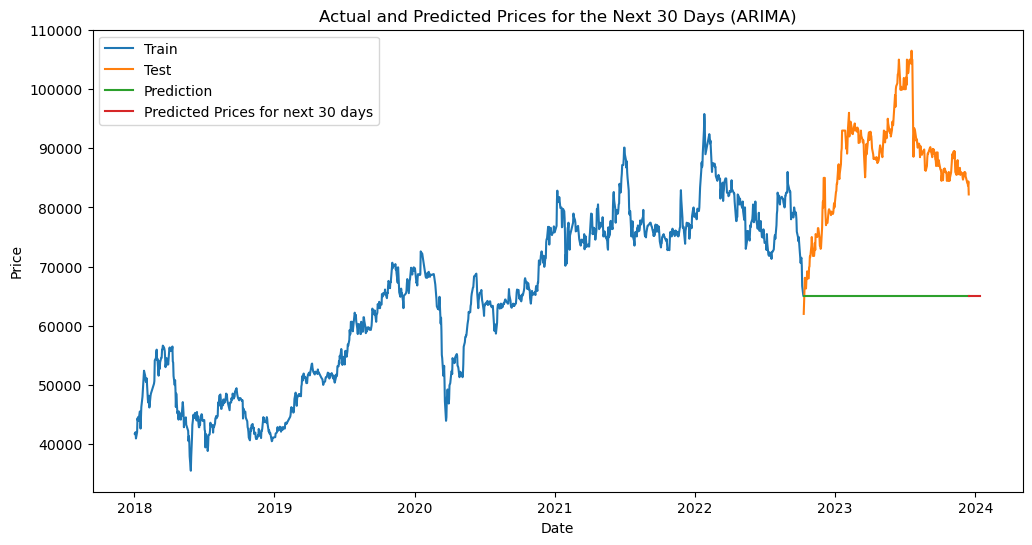

In [23]:
# Predict values for the next 30 days (model 8:2)
x_next_30_day_sarima2 = []

# Use the last known value in your dataset as the starting point
last_data = np.array(df['Price'].iloc[-1])

for i in range(30):
    # Predict using ARIMA model
    prediction2 = model82.predict(start=len(df), end=len(df) + i, dynamic=False)
    x_pred_next_sarima2 = prediction2.values[-1]  # Access the values attribute instead of predicted_mean
    x_next_30_day_sarima2.append(x_pred_next_sarima2)

    # Update last_data for the next iteration
    last_data = np.array([x_pred_next_sarima2])

# Generate dates for the next 30 days
next_30_days2 = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Convert dates to a format compatible with your datetime index (if needed)
next_30_days_str2 = [date.strftime('%Y-%m-%d') for date in next_30_days2]

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(train2.index, train2['Price'], label='Train')
plt.plot(test2.index, test2['Price'], label='Test')
plt.plot(predictions2.index, predictions2, label='Prediction')
plt.plot(next_30_days2, x_next_30_day_sarima2, label='Predicted Prices for next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual and Predicted Prices for the Next 30 Days (ARIMA)')
plt.legend()
plt.show()


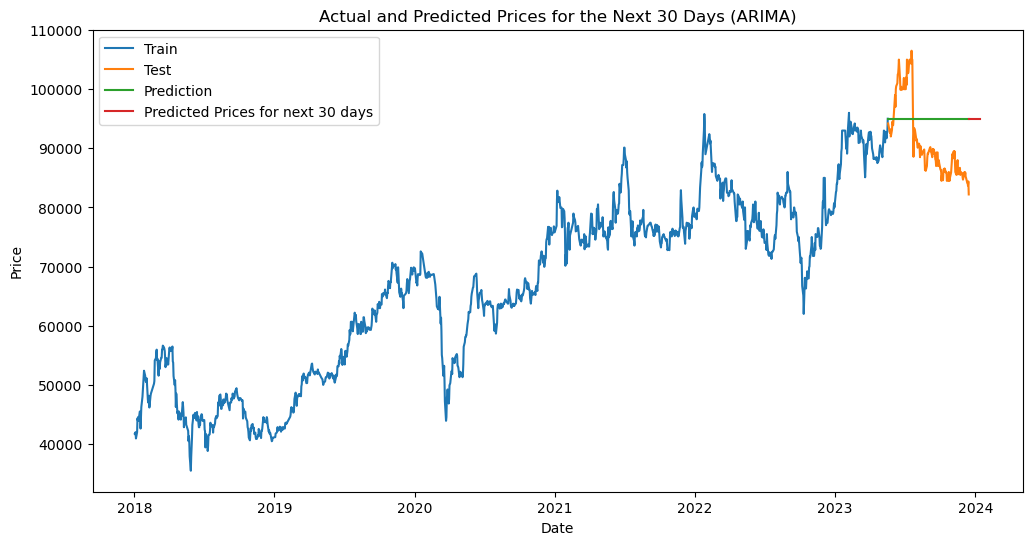

In [24]:
# Predict values for the next 30 days (model 9:1)
x_next_30_day_sarima3 = []

# Use the last known value in your dataset as the starting point
last_data = np.array(df['Price'].iloc[-1])

for i in range(30):
    # Predict using ARIMA model
    prediction3 = model91.predict(start=len(df), end=len(df) + i, dynamic=False)
    x_pred_next_sarima3 = prediction3.values[-1]  # Access the values attribute instead of predicted_mean
    x_next_30_day_sarima3.append(x_pred_next_sarima3)

    # Update last_data for the next iteration
    last_data = np.array([x_pred_next_sarima3])

# Generate dates for the next 30 days
next_30_days3 = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Convert dates to a format compatible with your datetime index (if needed)
next_30_days_str3 = [date.strftime('%Y-%m-%d') for date in next_30_days3]

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(train3.index, train3['Price'], label='Train')
plt.plot(test3.index, test3['Price'], label='Test')
plt.plot(predictions3.index, predictions3, label='Prediction')
plt.plot(next_30_days3, x_next_30_day_sarima3, label='Predicted Prices for next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual and Predicted Prices for the Next 30 Days (ARIMA)')
plt.legend()
plt.show()


In [25]:
# Evaluate the accuracy (model 7:3)

sarima_mape1 = mean_absolute_percentage_error(test1.Price.values, predictions1.values) * 100
sarima_mae1 = mae(test1.Price.values, predictions1.values)
sarima_rmse1 = np.sqrt(np.mean((predictions1.values - test1.Price.values)**2))
sarima_msle1 = mean_squared_log_error(test1.Price.values, predictions1.values)

print("SARIMA MAPE:\t", sarima_mape1)
print("SARIMA MSLE:\t", sarima_msle1)
print("SARIMA MAE: \t",  sarima_mae1)
print("SARIMA RMSE:\t", sarima_rmse1)

SARIMA MAPE:	 8.470640245001487
SARIMA MSLE:	 0.011213643781671669
SARIMA MAE: 	 7324.986577181208
SARIMA RMSE:	 9060.207606971917


In [26]:
# Evaluate the accuracy (model 8:2)

sarima_mape2 = mean_absolute_percentage_error(test2.Price.values, predictions2.values) * 100
sarima_mae2 = mae(test2.Price.values, predictions2.values)
sarima_rmse2 = np.sqrt(np.mean((predictions2.values - test2.Price.values)**2))
sarima_msle2 = mean_squared_log_error(test2.Price.values, predictions2.values)

print("SARIMA MAPE:\t", sarima_mape2)
print("SARIMA MSLE:\t", sarima_msle2)
print("SARIMA MAE: \t",  sarima_mae2)
print("SARIMA RMSE:\t", sarima_rmse2)

SARIMA MAPE:	 25.218848720472508
SARIMA MSLE:	 0.09665466790260892
SARIMA MAE: 	 22774.728187919463
SARIMA RMSE:	 24228.474426250817


In [27]:
# Evaluate the accuracy (model 9:1)

sarima_mape3 = mean_absolute_percentage_error(test3.Price.values, predictions3.values) * 100
sarima_mae3 = mae(test3.Price.values, predictions3.values)
sarima_rmse3 = np.sqrt(np.mean((predictions3.values - test3.Price.values)**2))
sarima_msle3 = mean_squared_log_error(test3.Price.values, predictions3.values)

print("SARIMA MAPE:\t", sarima_mape3)
print("SARIMA MSLE:\t", sarima_msle3)
print("SARIMA MAE: \t",  sarima_mae3)
print("SARIMA RMSE:\t", sarima_rmse3)

SARIMA MAPE:	 7.644681432406432
SARIMA MSLE:	 0.006425250838913684
SARIMA MAE: 	 6893.496644295302
SARIMA RMSE:	 7401.771854353025
